In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/8/Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


## Preprocess the data

In [13]:
# Drop 'CustomerID' and convert 'Gender' to numeric
df_processed = df.drop('CustomerID', axis=1)
df_processed['Gender'] = df_processed['Gender'].map({'Male': 0, 'Female': 1})

df_processed.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


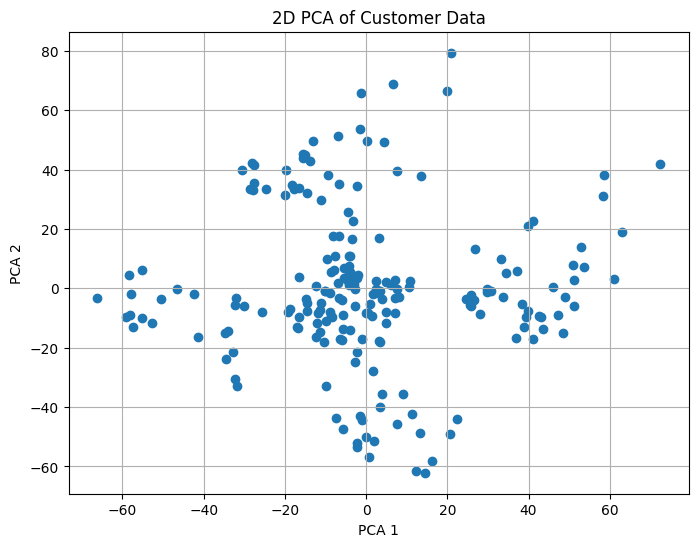

In [14]:
# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('2D PCA of Customer Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

## Elbow Method to find optimal K

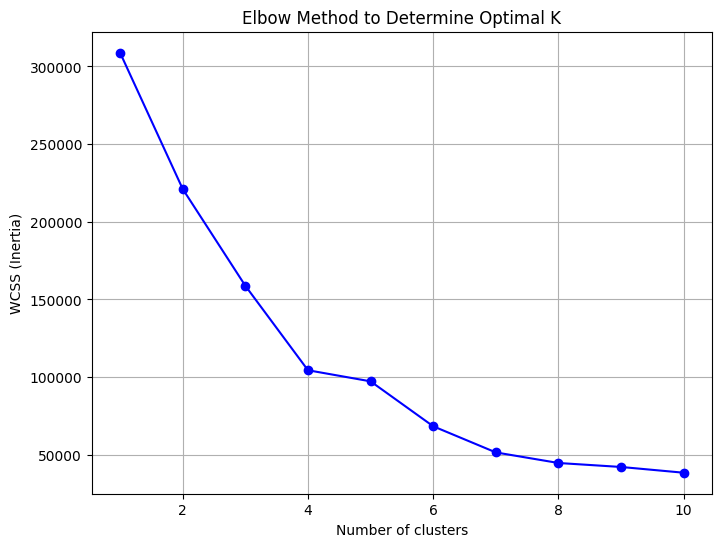

In [15]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, wcss, 'bo-')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

## Fit K-Means with optimal K (let K=5 from Elbow plot)

In [16]:
optimal_k = 5  # update this if your elbow plot suggests otherwise

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_processed['Cluster'] = kmeans.fit_predict(df_processed)

df_processed.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


## Reuse PCA result and add clusters

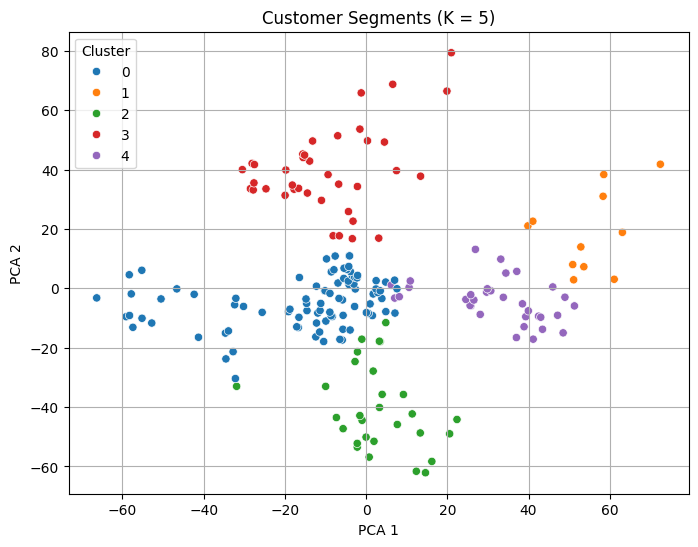

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df_processed['Cluster'], palette='tab10')
plt.title(f'Customer Segments (K = {optimal_k})')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [18]:
score = silhouette_score(df_processed.drop('Cluster', axis=1), df_processed['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {score:.3f}")


Silhouette Score for K=5: 0.357
